In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os, json
import pydicom
import pandas as pd

import seaborn as sns
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['stage_1_detailed_class_info.csv', 'stage_1_sample_submission.csv', 'stage_1_test_images', 'stage_1_train_labels.csv', 'stage_1_train_images', 'GCP Credits Request Link - RSNA.txt']


In [2]:
# Read the input data
input_data = pd.read_csv("../input/stage_1_detailed_class_info.csv")
input_data['img_path'] = '../input/stage_1_train_images/' + input_data['patientId'] + '.dcm'

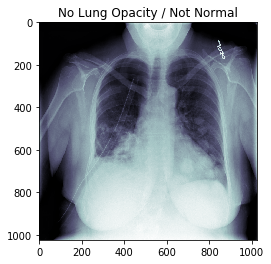

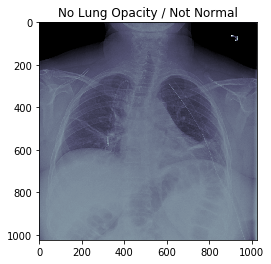

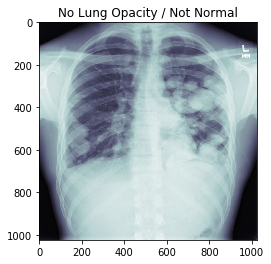

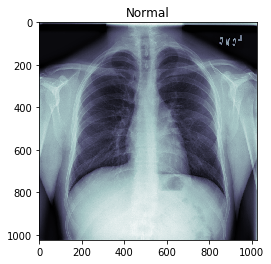

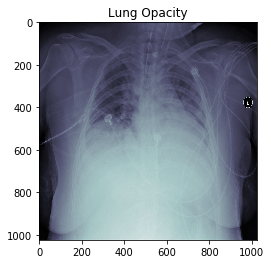

In [3]:
# Read the data and print the X-Ray Chest images 
for i, row in enumerate(input_data.head().values):
    image_name = row[0]
    pneumonia_class = row[1]
    image_path = row[2]
    ds = pydicom.dcmread(image_path)
    plt.figure()
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.title(pneumonia_class)

In [4]:
# Read the metadata from DICOM image and save the import fields
df = pd.DataFrame(columns=['Age', 'Sex', 'ViewPosition', 'Class'])
for i, row in enumerate(input_data.values):
    image_name = row[0]
    pneumonia_class = row[1]
    image_path = row[2]
    dcm_data = pydicom.read_file(image_path)
    df.loc[i] = dcm_data.PatientAge, dcm_data.PatientSex, dcm_data.ViewPosition, pneumonia_class 
    
    

Text(0.5,0,'Age')

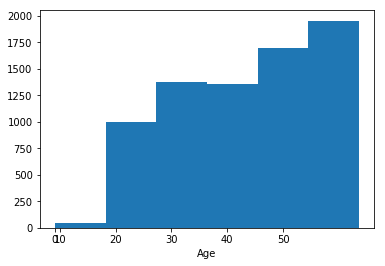

In [5]:
# Plot the distribution of age for Lung Opacity cases
plt.hist(df[df.Class == 'Lung Opacity'].Age, bins=[0,10,20,30,40,50,60])
plt.xticks(range(0,60,10), range(0,60,10))
plt.xlabel('Age')


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


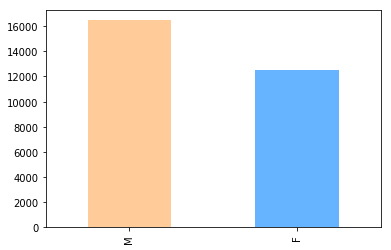

In [6]:
# Show the distribution of Sex
colors = ['#ffcc99', '#66b3ff', '#ff9999', '#99ff99']
df.Sex.value_counts().plot(kind='bar', colors=colors)

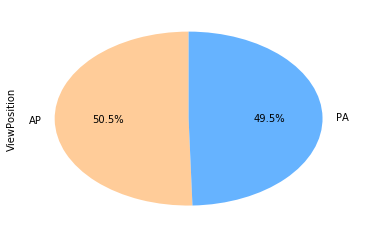

In [7]:
# Show the distribution of View Position
df['ViewPosition'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                   startangle=90, fontsize=10, colors = colors)

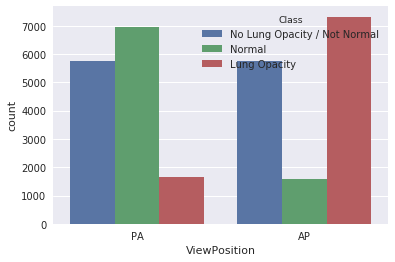

In [8]:
# Show the distribution of View Position with respect to target class
sns.set()
sns.countplot(x = 'ViewPosition', hue = 'Class', data = df);

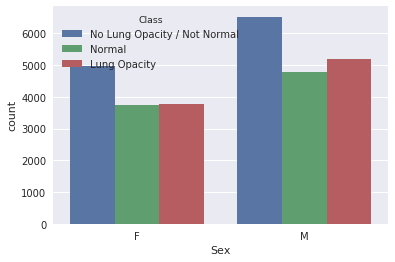

In [9]:
# Show the distribution of Sex with respect to target class
sns.countplot(x = 'Sex', hue = 'Class', data = df);

In [10]:
# Sample data
df.head()

,Age,Sex,ViewPosition,Class
0,51,F,PA,No Lung Opacity / Not Normal
1,48,F,PA,No Lung Opacity / Not Normal
2,19,M,AP,No Lung Opacity / Not Normal
3,28,M,PA,Normal
4,32,F,AP,Lung Opacity


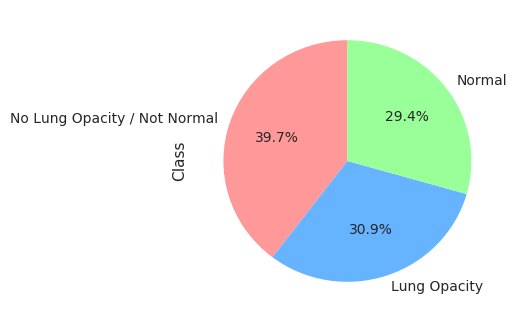

In [11]:
# Show the class balance in train images
fig = plt.figure(figsize=(4,4), dpi=100)
ax = plt.subplot(111)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df['Class'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', 
                                   startangle=90, fontsize=10, colors = colors)

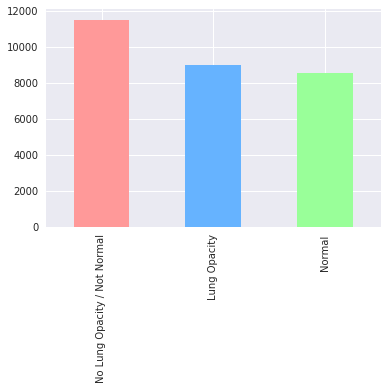

In [12]:
# Show the total images distributed across the three classes
ax = plt.subplot(111)
df['Class'].value_counts().plot(kind='bar', ax=ax, color=colors)